### Import Analysis Functionality

In [1]:
import analysis
import os

# Create a new folder to store the plots
os.makedirs(analysis.PLOT_OUTPUT_FOLDER, exist_ok=True)

### Load Decision Results

In [2]:
# Load a dataframe with all decision results
df_decisions = analysis.load_decision_data()
print("Shape of dataframe:", df_decisions.shape)

Shape of dataframe: (630000, 20)


### Plot Biasedness Heatmap

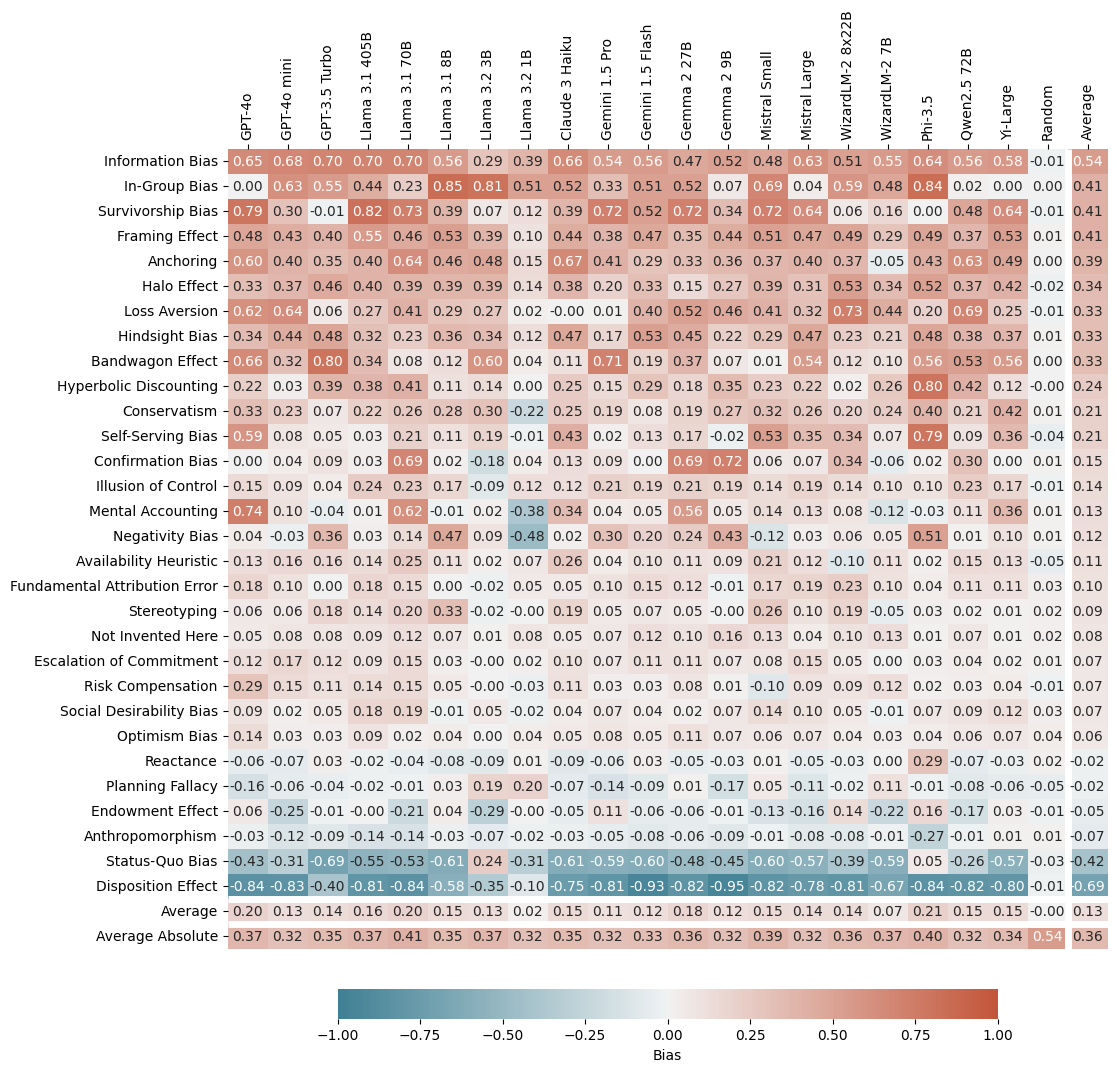

In [3]:
# Plot a mean biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, legend=True, figsize=(11, 10), save_plot=True)

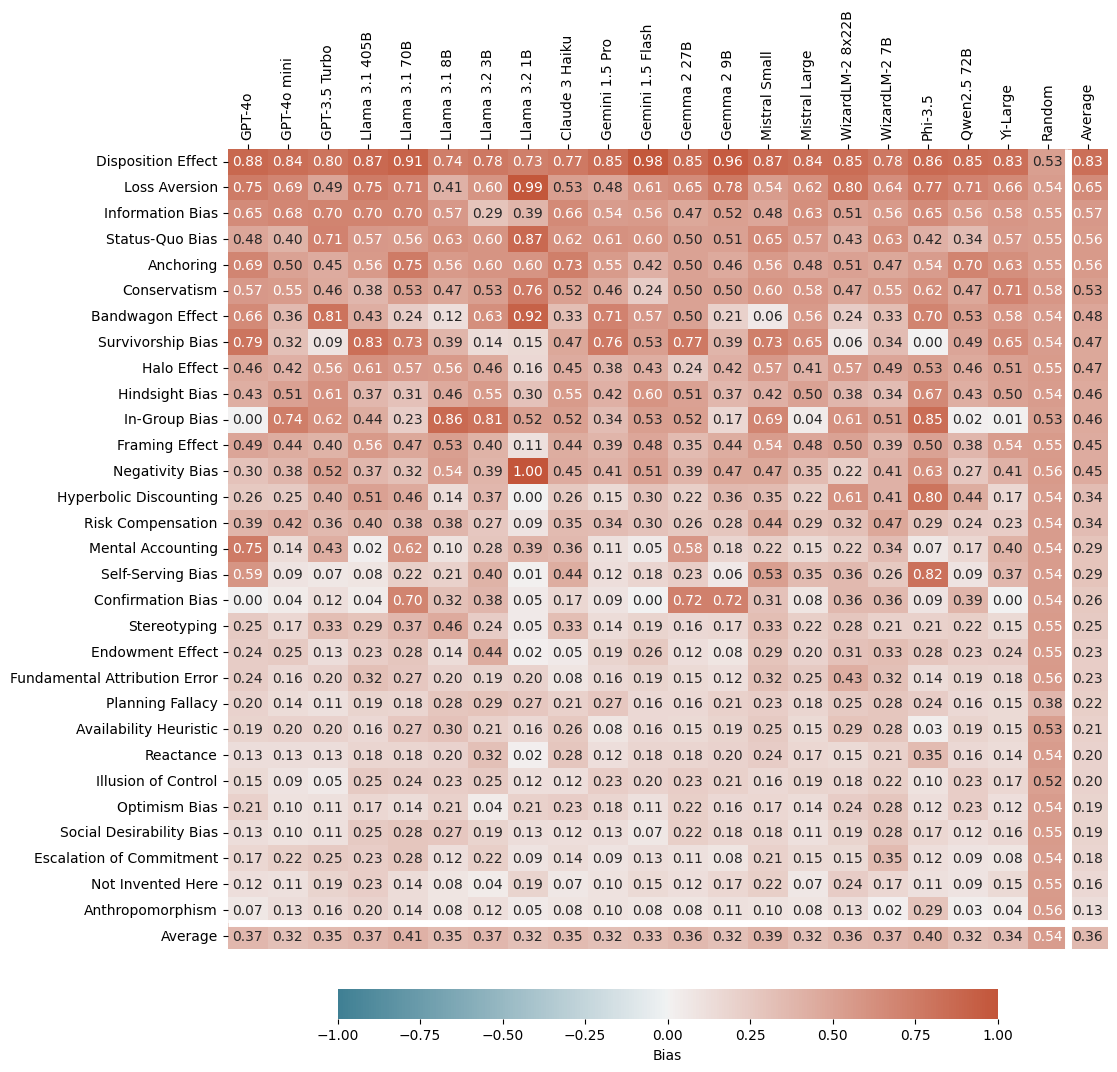

In [4]:
# Plot a mean absolute biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, legend=True, figsize=(11, 10), add_avg_abs=False, save_plot=False, abs=True)

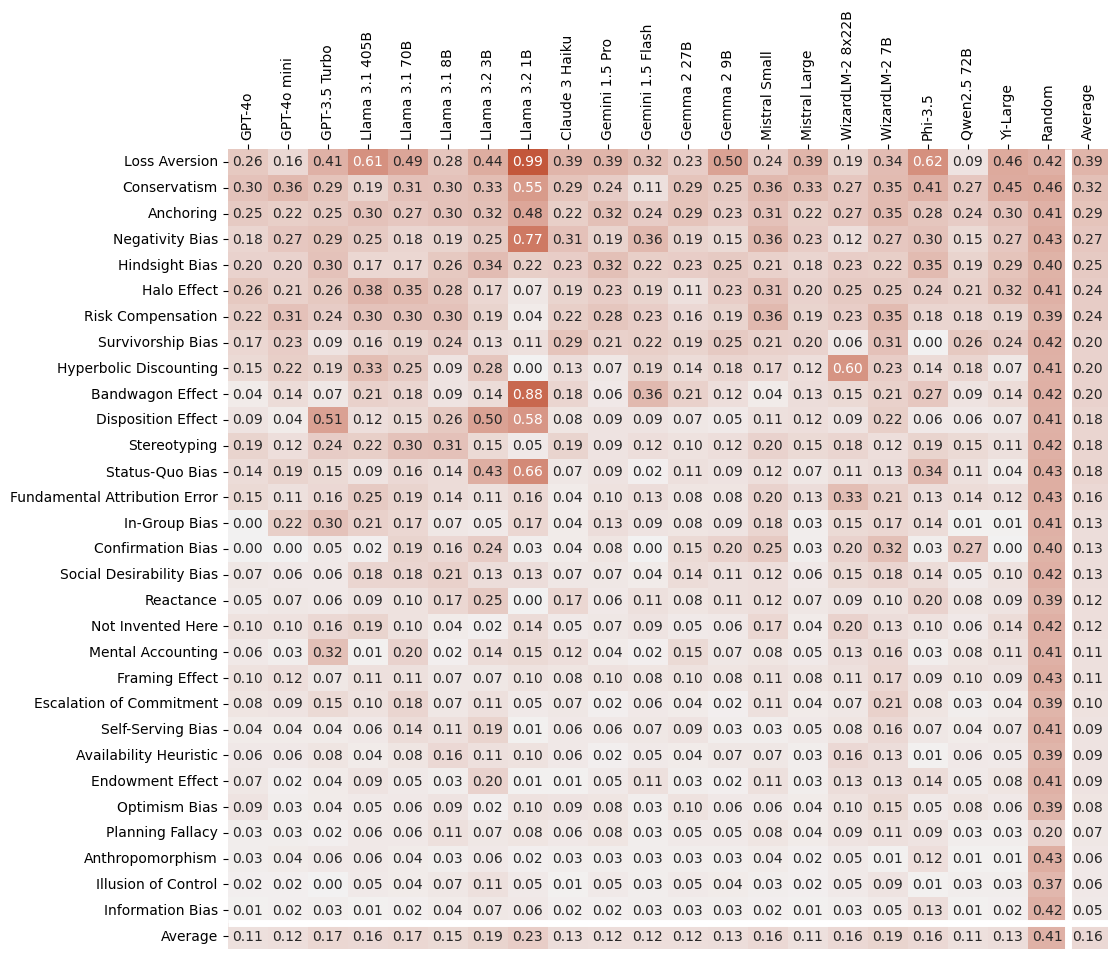

In [5]:
# Plot a bias variance heatmap
analysis.plot_bias_heatmap(df_decisions, legend=False, add_avg_abs=False, figsize=(11, 10), save_plot=False, agg='var')

### Prepare Data for Pattern Analysis

In [6]:
# Load a dataframe with test results per model
df_biasedness = analysis.load_model_bias_data()
print("Shape of dataframe:", df_biasedness.shape)

Shape of dataframe: (21000, 32)


In [7]:
# Impute missing values (i.e., failed test cases)
df_biasedness = analysis.impute_missing_values(df_biasedness)

### Plot Scatterplots of Full Dataset

In [8]:
# Prepare dimensionality reduction of data
df_pca = analysis.reduce_with_pca(df_biasedness)
df_umap = analysis.reduce_with_umap(df_biasedness)

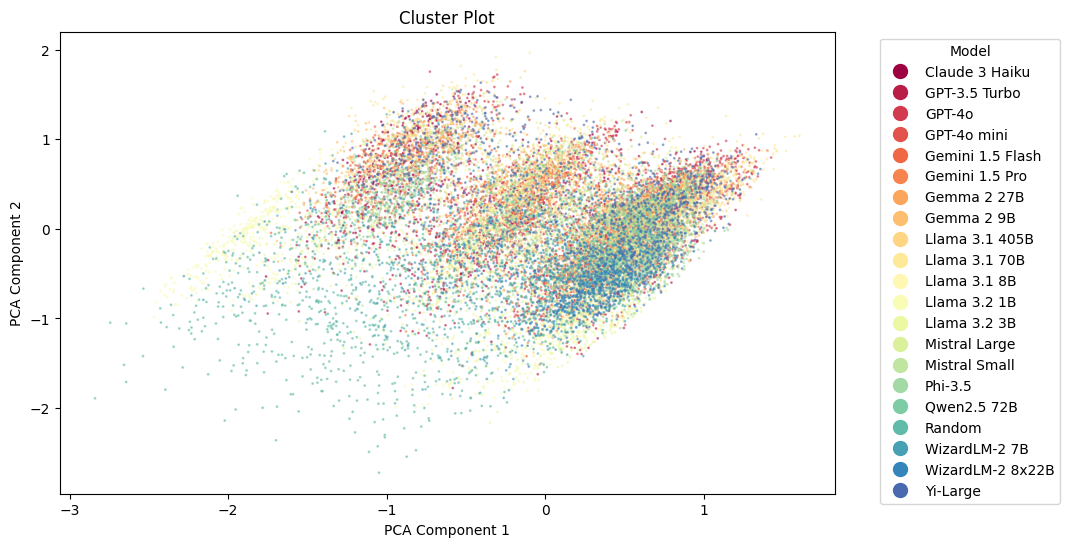

In [9]:
# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca
df_scatter["Model"] = df_biasedness["model"]
analysis.plot_scatter(df_scatter, label="Model", save_plot=False)

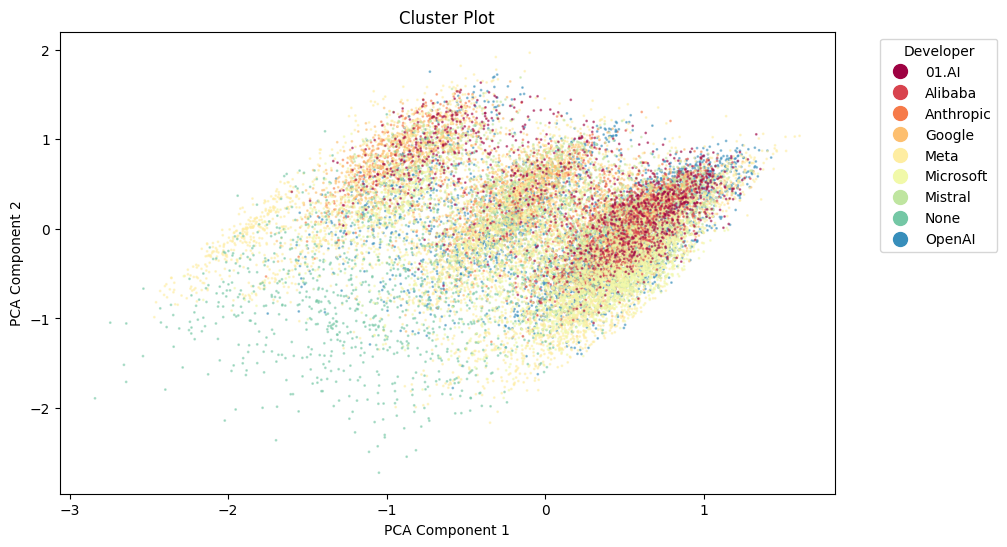

In [10]:
# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca
df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

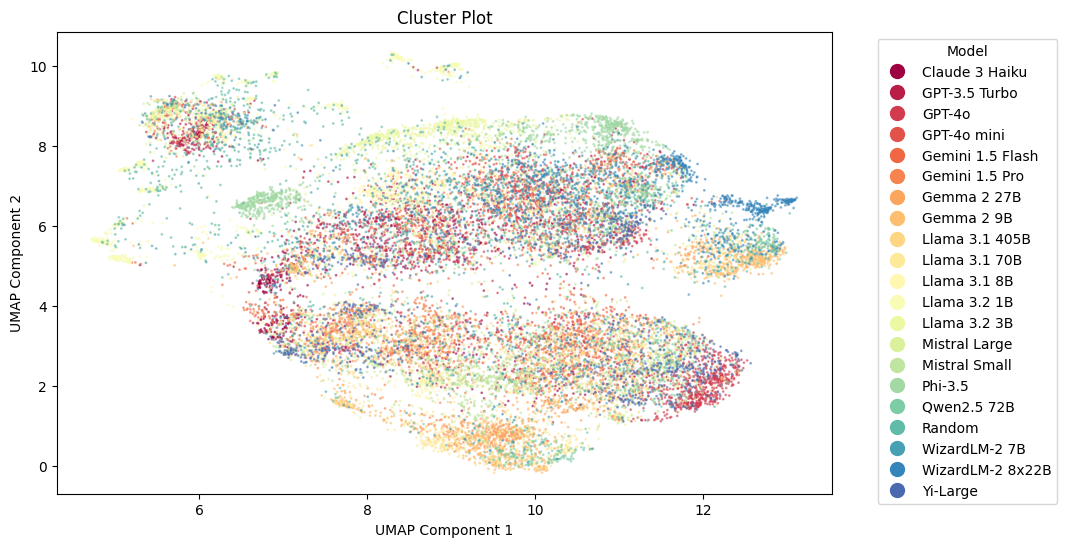

In [11]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Model"] = df_biasedness["model"]
analysis.plot_scatter(df_scatter, label="Model", save_plot=True)

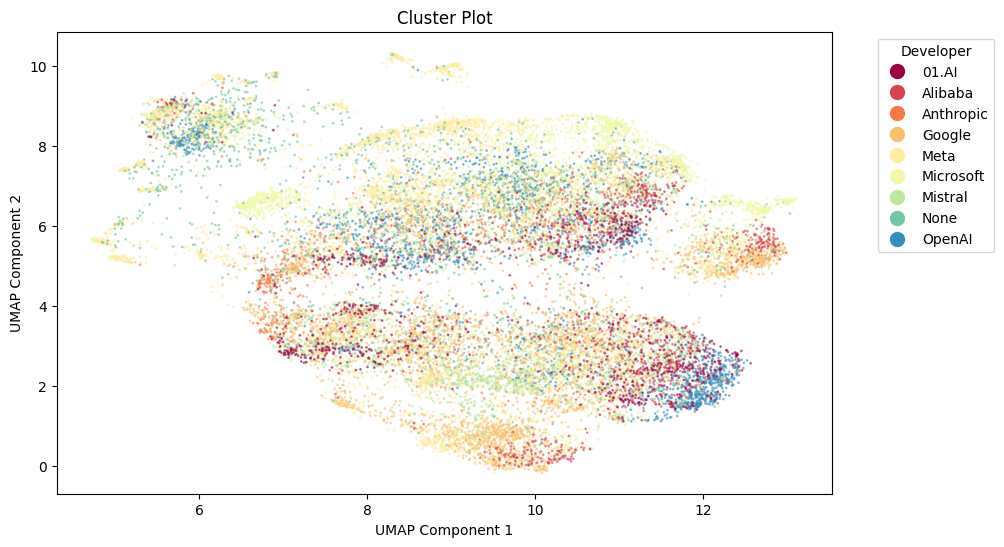

In [12]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

### Plot Scatterplots of Models

In [13]:
# Group the results by models and take the mean bias for all models
df_biasedness_grouped = analysis.group_by(df_biasedness, "model")

In [14]:
# Prepare dimensionality reduction of data
df_pca = analysis.reduce_with_pca(df_biasedness_grouped)
df_umap = analysis.reduce_with_umap(df_biasedness_grouped)

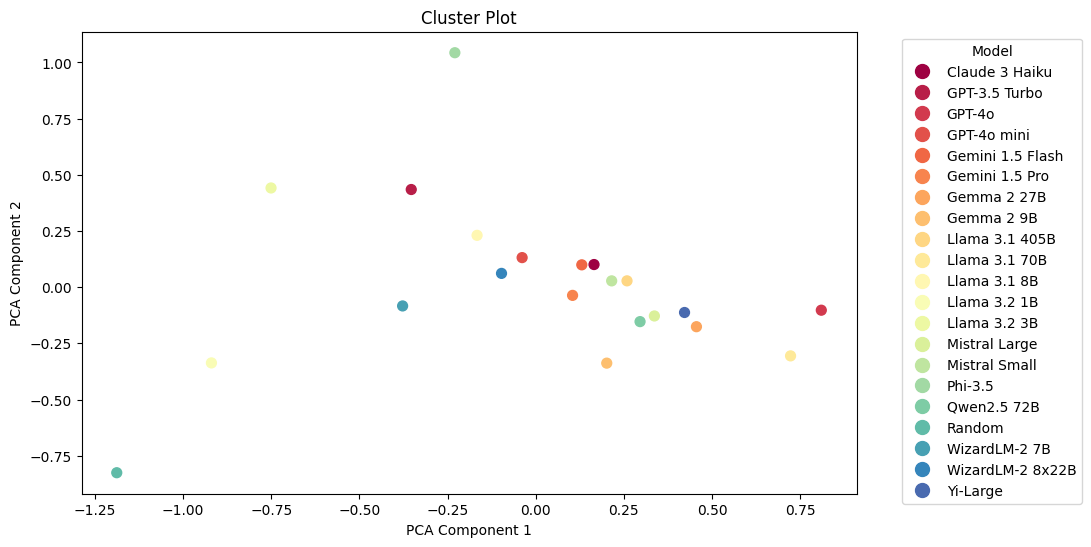

In [15]:
# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

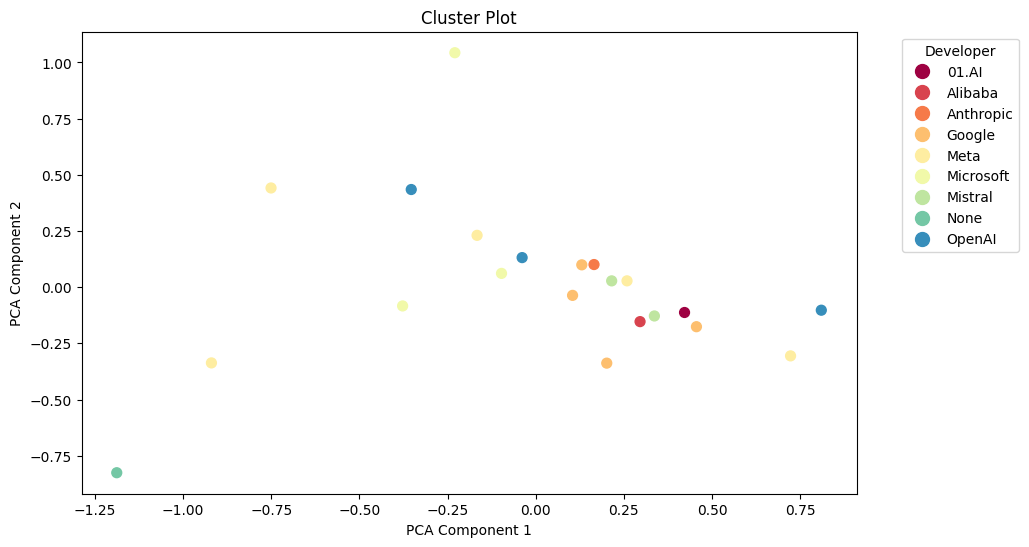

In [16]:
# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

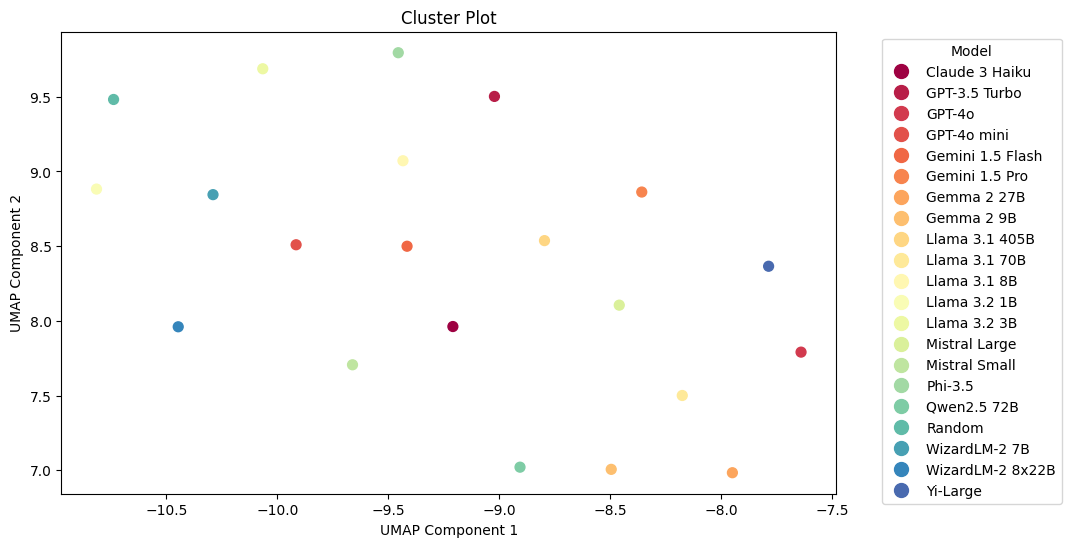

In [17]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

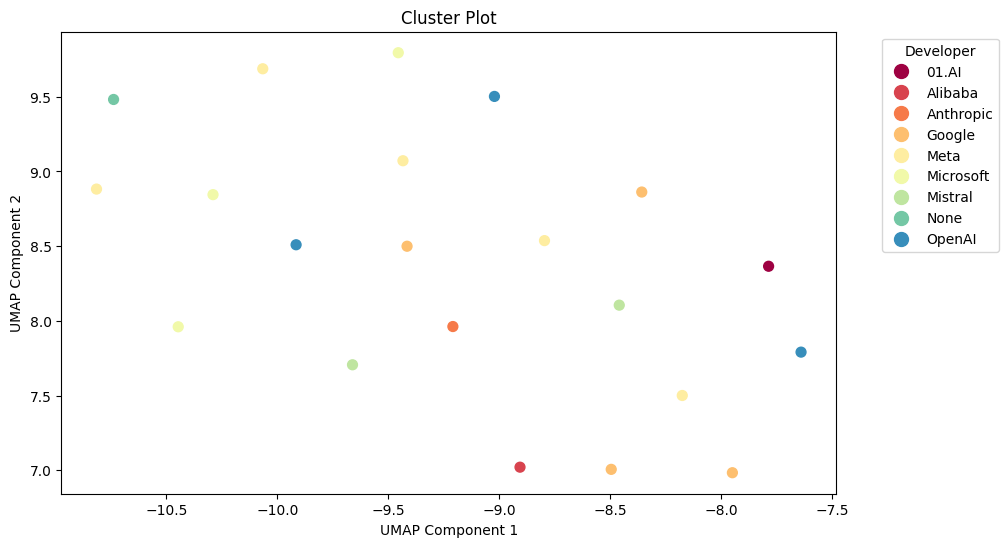

In [18]:
# Perform UMAP and create a scatter plot showing the model developers
df_scatter = df_umap
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

### Plot Dendrograms of Models

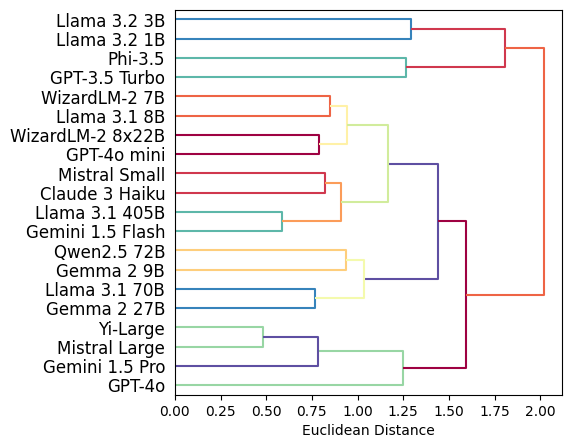

In [19]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='complete', metric='euclidean', n_clusters=12, save_plot=True)

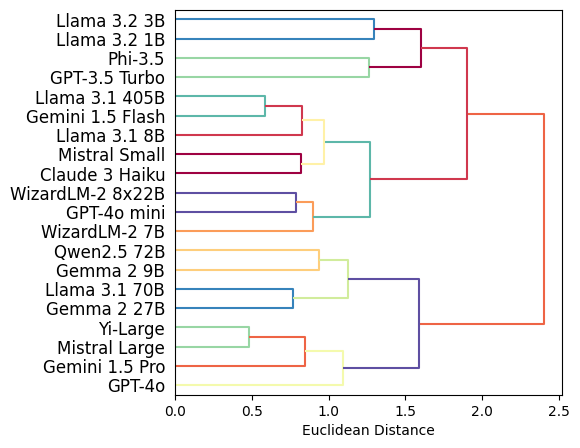

In [20]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='ward', metric='euclidean', n_clusters=12, save_plot=False)

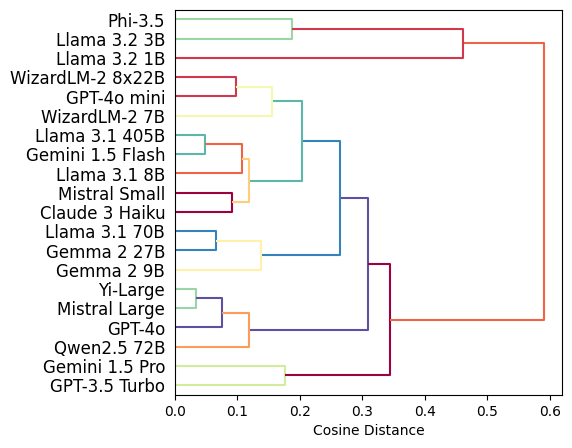

In [21]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='complete', metric='cosine', n_clusters=12, save_plot=False)

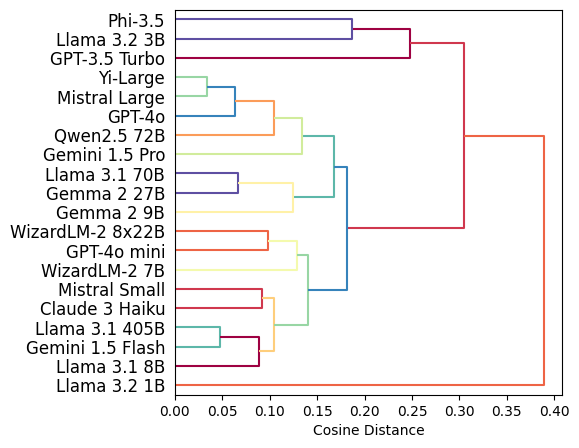

In [22]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='average', metric='cosine', n_clusters=12, save_plot=False)

### Correlation of Biases

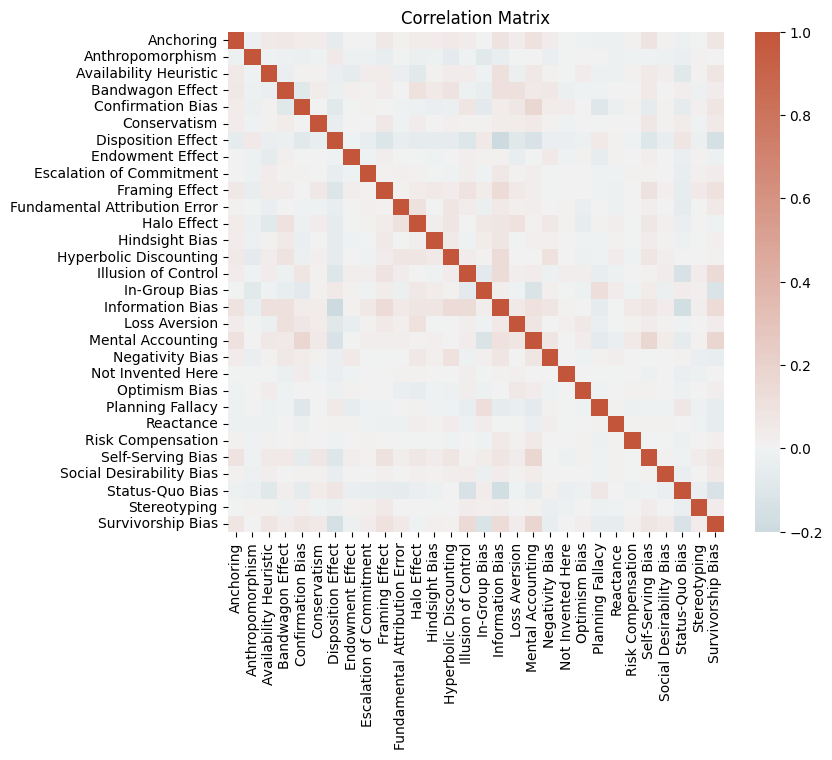

In [23]:
# Plot a correlation matrix of all bias values
analysis.plot_correlation_matrix(df_biasedness, save_plot=False)

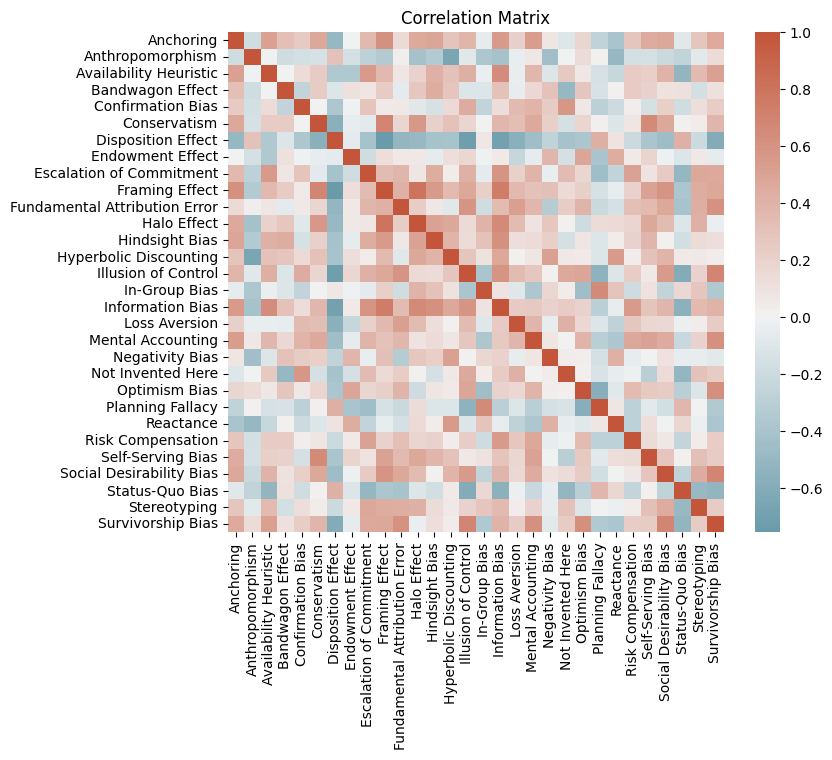

In [24]:
# Plot a correlation matrix of the mean bias values
analysis.plot_correlation_matrix(df_biasedness_grouped, save_plot=True)

<Figure size 800x650 with 0 Axes>

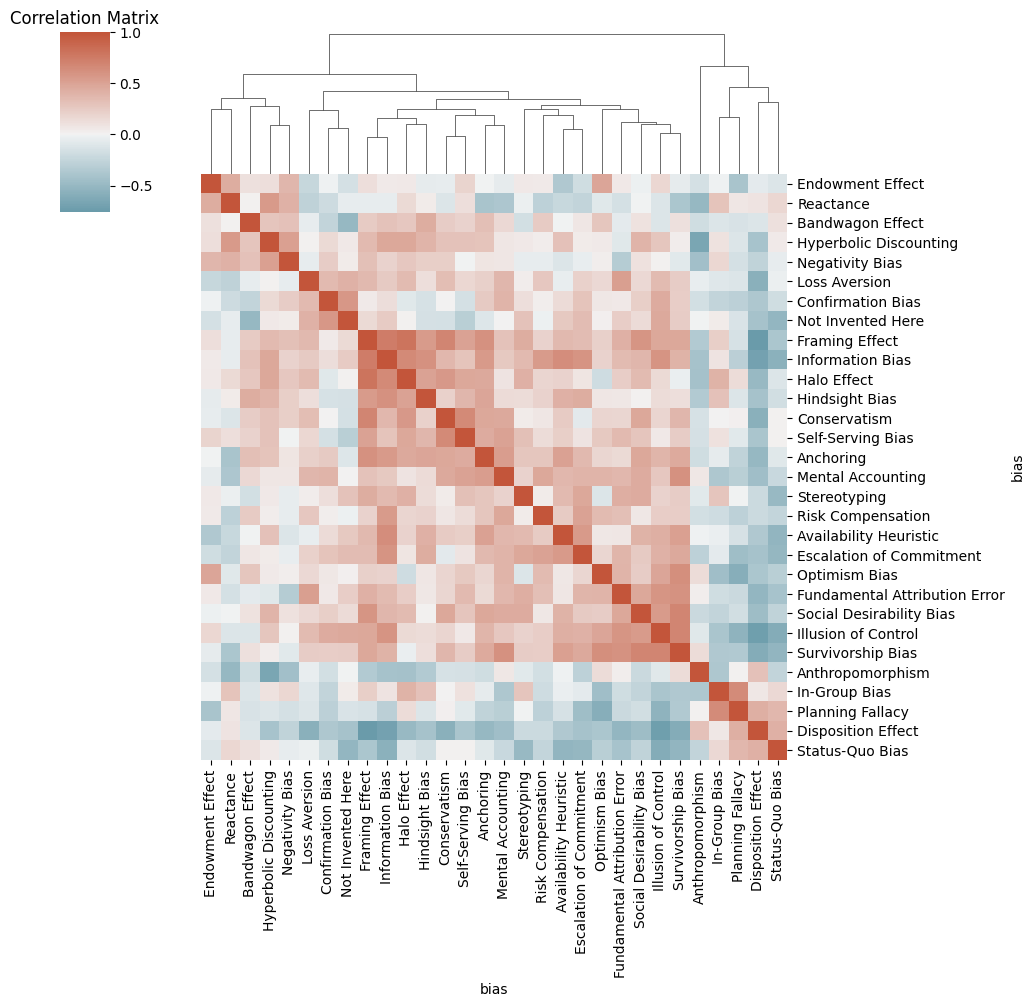

In [25]:
# Plot a correlation matrix with a connected dendrogram
analysis.plot_correlation_matrix_with_dendrogram(df_biasedness_grouped, save_plot=False)

### Bubble Plot of Models

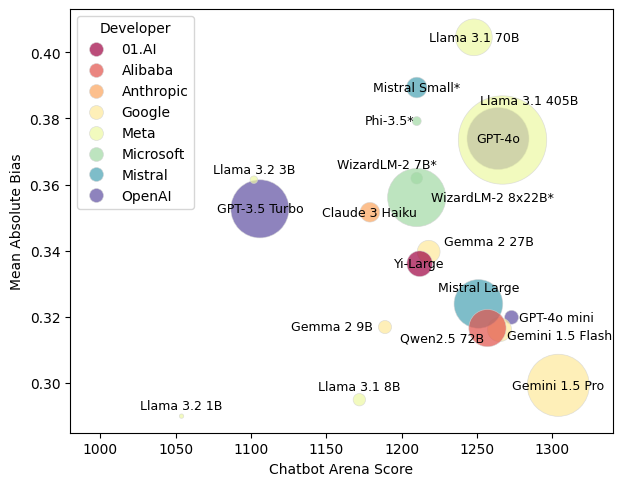

In [26]:
# Load a dataframe with model characteristics
df_mean_abs_bias = analysis.load_model_characteristics(df_decisions, df_biasedness)

# Define the label positions
label_offset = {
    'GPT-4o': (0.0, 0.0),
    'GPT-4o mini': (30, 0.0),
    'GPT-3.5 Turbo': (0.0, 0.0),
    'Llama 3.1 405B': (18, 0.012),
    'Llama 3.1 70B': (0.0, 0.0),
    'Llama 3.1 8B': (0.0, 0.004),
    'Llama 3.2 3B': (0.0, 0.003),
    'Llama 3.2 1B': (0.0, 0.003),
    'Claude 3 Haiku': (0.0, 0.0),
    'Gemini 1.5 Pro': (0.0, 0.0),
    'Gemini 1.5 Flash': (40, -0.002),
    'Gemma 2 27B': (40, 0.003),
    'Gemma 2 9B': (-35, 0.0),
    'Mistral Large': (0.0, 0.005),
    'Mistral Small*': (0.0, 0.0),
    'WizardLM-2 8x22B*': (50, 0.0),
    'WizardLM-2 7B*': (-20, 0.004),
    'Phi-3.5*': (-18, 0.0),
    'Qwen2.5 72B': (-30, -0.003),
    'Yi-Large': (0.0, 0.0),
    'Random*': (0.0, 0.0),
}

# Create the bubble plot
analysis.plot_bubble_plot(df_mean_abs_bias, x="Chatbot Arena Score", y="Mean Absolute Bias", size="Parameters", color="Developer", label="model", legendloc='upper left', xlim=(980, 1340), ylim=(0.285, 0.413), alpha=0.7, label_offset=label_offset, save_plot=True)